In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

path = 'population_en_v2.csv'
df = pd.read_csv(path)

df.head(10)

,Provinces/city,Population density,Average population,Sex ratio,Population grow ratio,15+ labor,Region,Year
0,Ha Noi,2031.1,6761.3,97.8,1.93,3572.9,Hong river Delta,2011
1,Vinh Phuc,818.0,1011.4,97.6,0.38,608.3,Hong river Delta,2011
2,Bac Ninh,1292.6,1063.4,96.7,1.84,593.5,Hong river Delta,2011
3,Quang Ninh,191.4,1168.0,105.4,0.93,675.0,Hong river Delta,2011
4,Hai Duong,1044.6,1729.8,96.1,0.78,1071.0,Hong river Delta,2011
5,Hai Phong,1234.0,1879.8,98.5,1.19,1075.3,Hong river Delta,2011
6,Hung Yen,1229.4,1138.4,97.1,0.54,707.1,Hong river Delta,2011
7,Thai Binh,1137.5,1785.9,94.6,0.07,1134.2,Hong river Delta,2011
8,Ha Nam,914.5,786.9,95.5,0.07,464.0,Hong river Delta,2011
9,Nam Dinh,1110.3,1833.5,95.8,0.19,1082.2,Hong river Delta,2011


In [19]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
625    False
626    False
627    False
628    False
629    False
Length: 630, dtype: bool


In [ ]:
# Lọc dữ liệu cho TP.HCM và Hà Nội
urban = ['Ho Chi Minh', 'Ha Noi']
urban_population = df[df['Provinces/city'].isin(urban)]

# Tính tổng dân số cho thành thị theo từng năm 
urban_population_by_year = urban_population.groupby("Year")["Average population"].sum().reset_index()


# Lọc dữ liệu cho các tỉnh còn lại
rural_population = df[~df["Provinces/city"].isin(urban)]

# Tính tổng dân số của các tỉnh còn lại theo từng năm
rural_population_by_year = rural_population.groupby("Year")["Average population"].sum().reset_index()

# In kết quả
print("Dân số thành thị theo năm:")
print(urban_population_by_year)
print("\nDân số nông thôn theo năm:")
print(rural_population_by_year)



In [ ]:
df['Population children'] = df['Average population'] - df['15+ labor']  # Trẻ em (0-14 tuổi)
# Tạo các cột phân chia giới tính
df['Population male'] = df['Average population'] * (df['Sex ratio'] / (100 + df['Sex ratio']))
df['Population female'] = df['Average population'] - df['Population male']




In [1]:
# Đồ thị theo độ tuổi cho từng vùng

# mảng vùng
Region_array = ["Hong river Delta", "Midlands and northern mountains", "North Central and Central Coast", "Highlands", "South East", "Mekong Delta"]

# vẽ đồ thị cho từng vùng
for region in Region_array:
    plt.figure(figsize=(12, 6)) # vẽ khung đồ thị
    region_data = df[df["Region"] == region]
    combined_data = region_data.groupby("Year")[["Population children", "15+ labor"]].sum().reset_index()

    plt.plot(combined_data["Year"], combined_data["Population children"], color = 'green', label='Trẻ em (<15 tuổi)')
    plt.plot(combined_data["Year"], combined_data["15+ labor"], color = 'orange', label='Người lao động(>=15 tuổi)')

    # đặt tên
    plt.title(f'Dân số theo độ tuổi vùng {region} qua các năm')
    plt.xticks(combined_data.Year)
    plt.xlabel('Năm')
    plt.ylabel('Dân số (nghìn người)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend();

NameError: name 'plt' is not defined

In [ ]:
summary_by_year = df.groupby('Year').sum() # Tóm tắt dữ liệu theo năm
print(summary_by_year.columns)

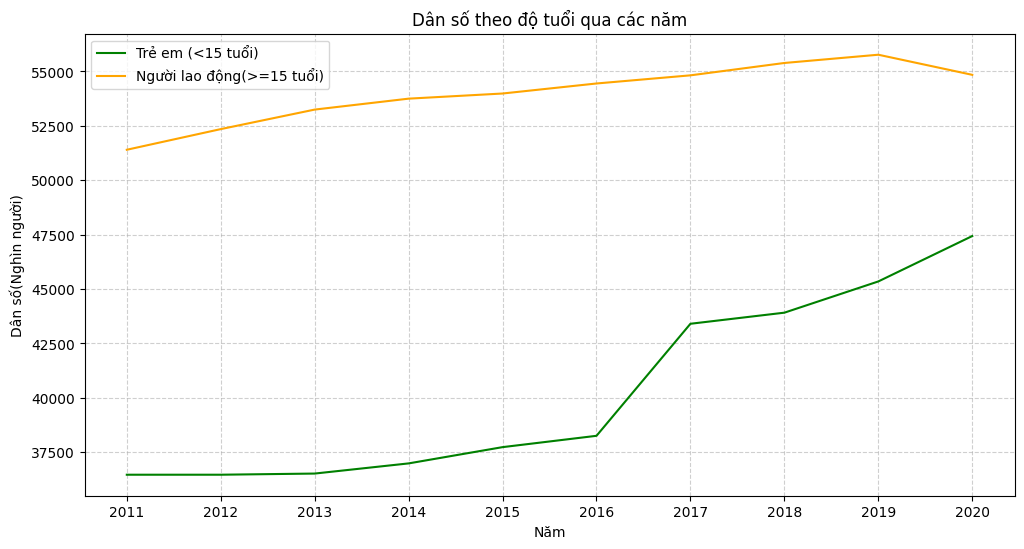

In [41]:
# Đồ thị phân bố dân số theo độ tuổi

plt.figure(figsize=(12, 6))
plt.title('Dân số theo độ tuổi qua các năm')
plt.plot(summary_by_year.index, summary_by_year['Population children'], color = 'green', label='Trẻ em (<15 tuổi)')
plt.plot(summary_by_year.index, summary_by_year['15+ labor'], color = 'orange', label='Người lao động(>=15 tuổi)')
plt.xticks(summary_by_year.index)
plt.ylabel('Dân số(Nghìn người)')
plt.xlabel('Năm')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

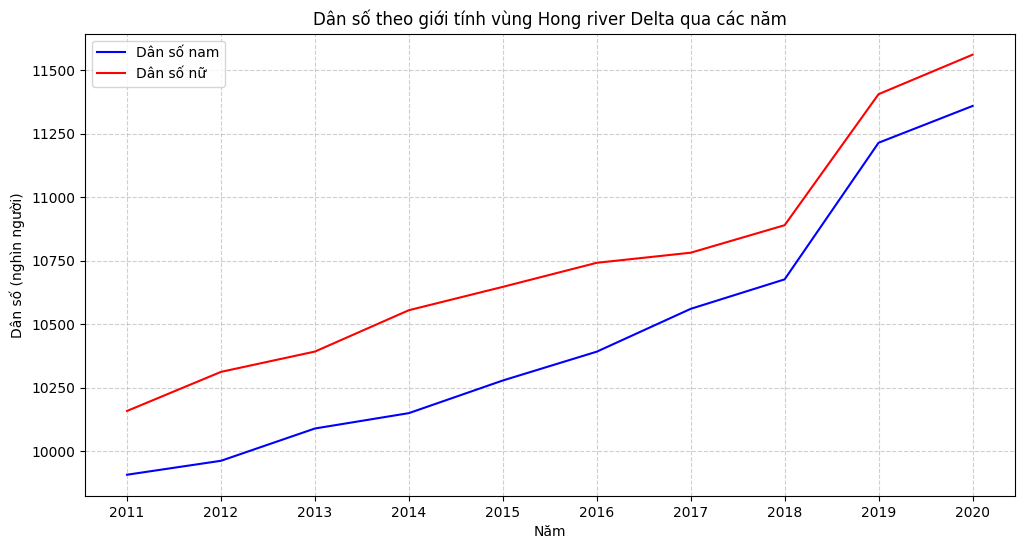

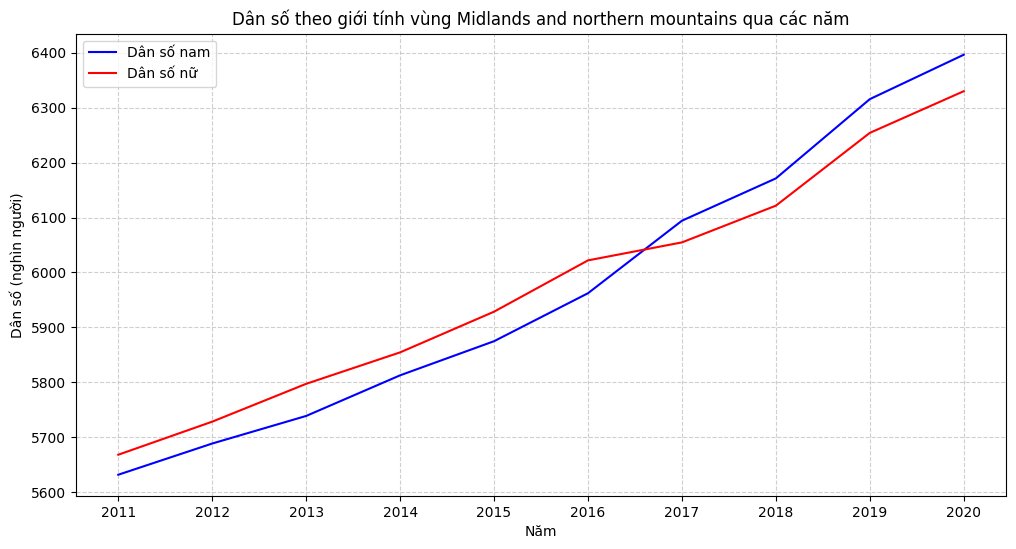

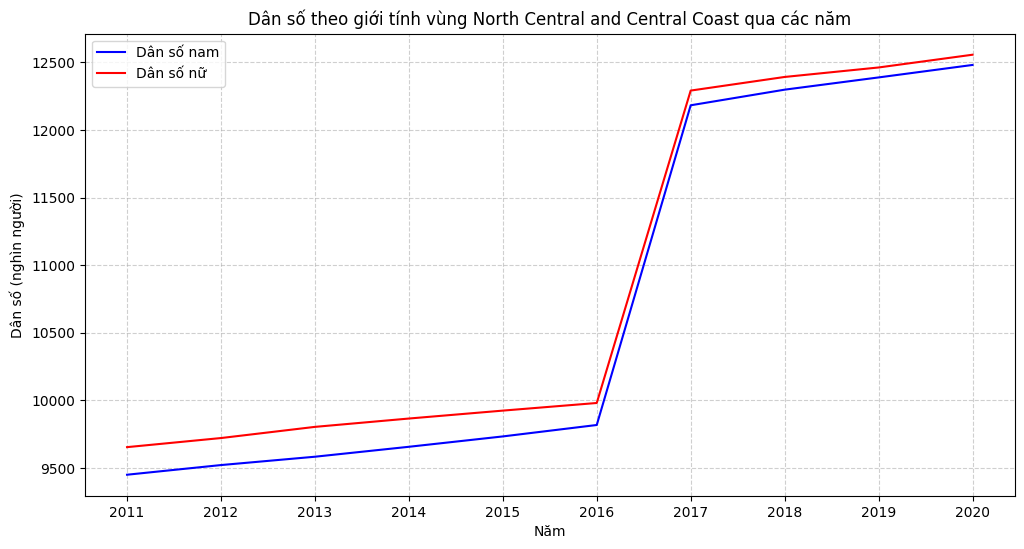

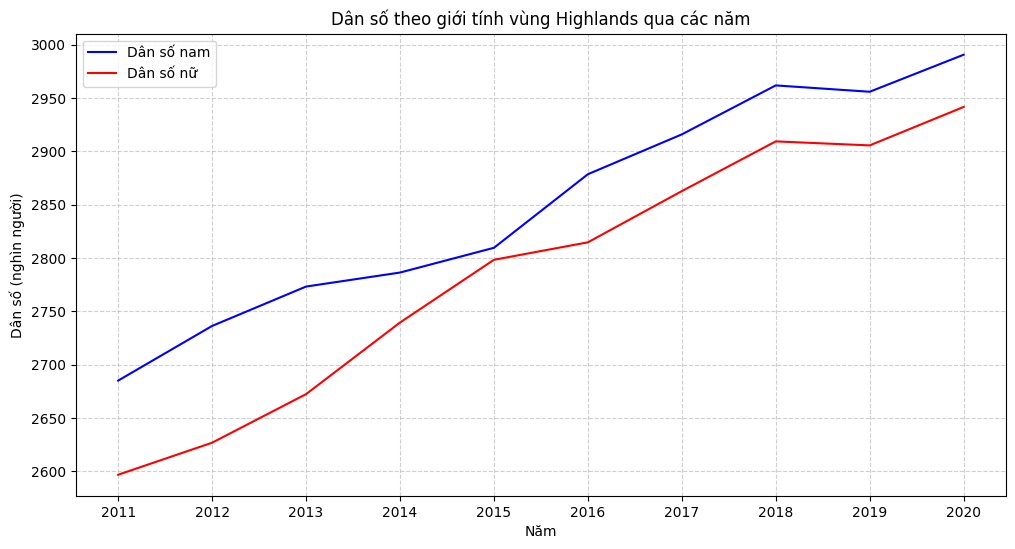

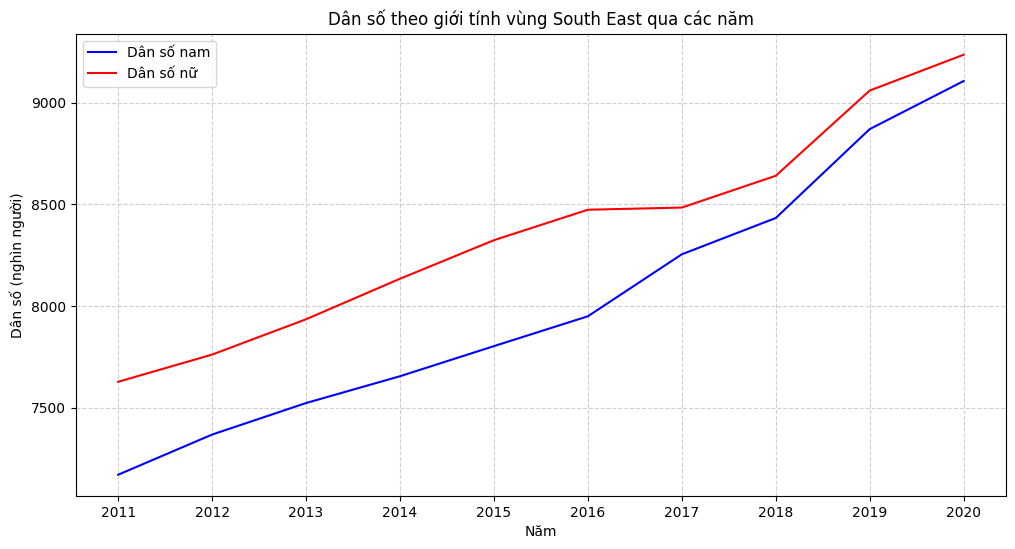

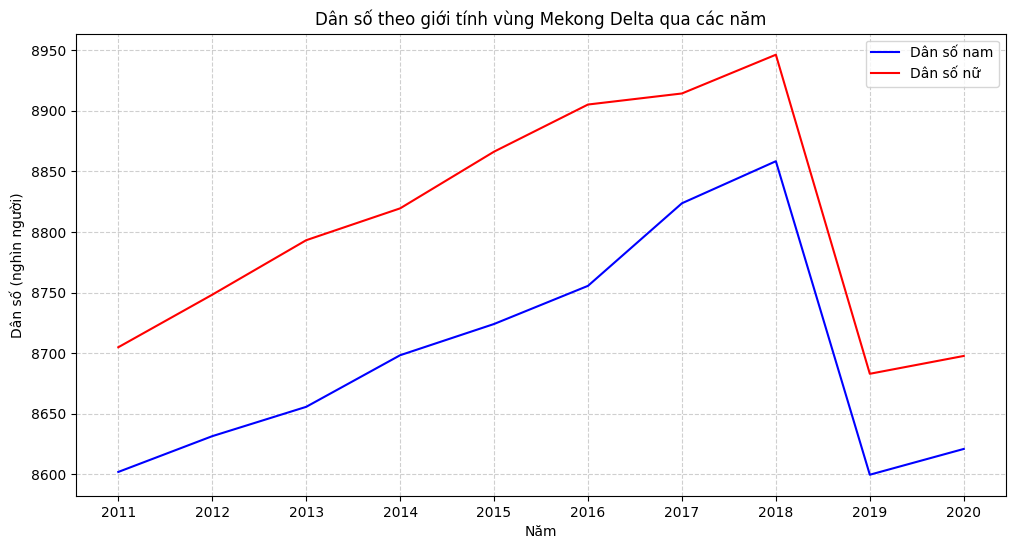

In [61]:
# Đồ thị theo giới tính cho từng vùng

# vẽ đồ thị cho từng vùng
for region in Region_array:
    plt.figure(figsize=(12, 6)) # vẽ khung đồ thị
    region_data = df[df["Region"] == region]
    combined_data = region_data.groupby("Year")[["Population male", "Population female"]].sum().reset_index()

    plt.plot(combined_data["Year"], combined_data["Population male"], color = 'blue', label='Dân số nam')
    plt.plot(combined_data["Year"], combined_data["Population female"], color = 'red', label='Dân số nữ')

    # đặt tên
    plt.title(f'Dân số theo giới tính vùng {region} qua các năm')
    plt.xticks(combined_data.Year)
    plt.xlabel('Năm')
    plt.ylabel('Dân số (nghìn người)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend();

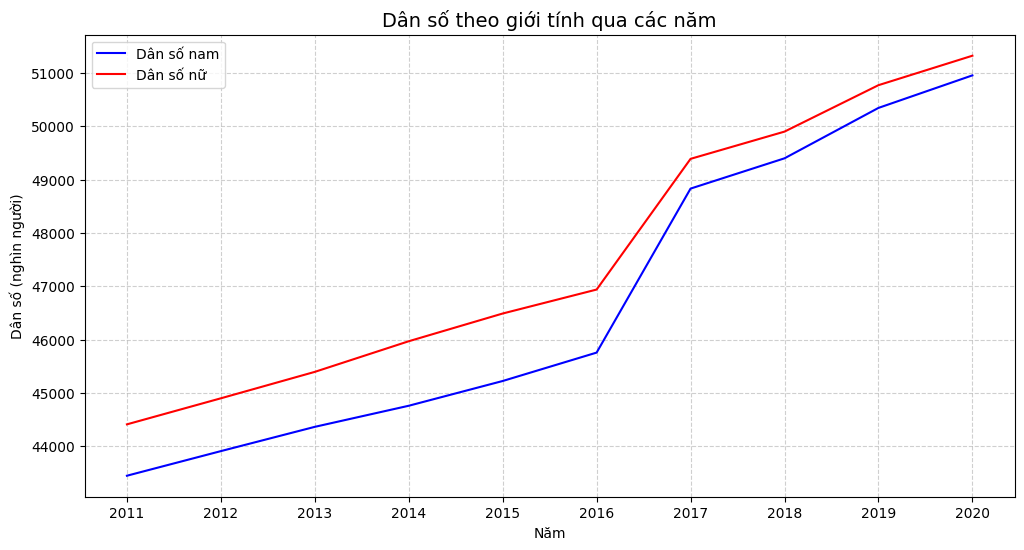

In [ ]:
# Vẽ biểu đồ: Dân số theo giới tính
plt.figure(figsize=(12, 6))
plt.plot(summary_by_year.index, summary_by_year['Population male'], label='Dân số nam', color='blue')
plt.plot(summary_by_year.index, summary_by_year['Population female'], label='Dân số nữ', color='red')
plt.title('Dân số theo giới tính qua các năm')
plt.xticks(summary_by_year.index)
plt.xlabel('Năm')
plt.ylabel('Dân số (nghìn người)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend();

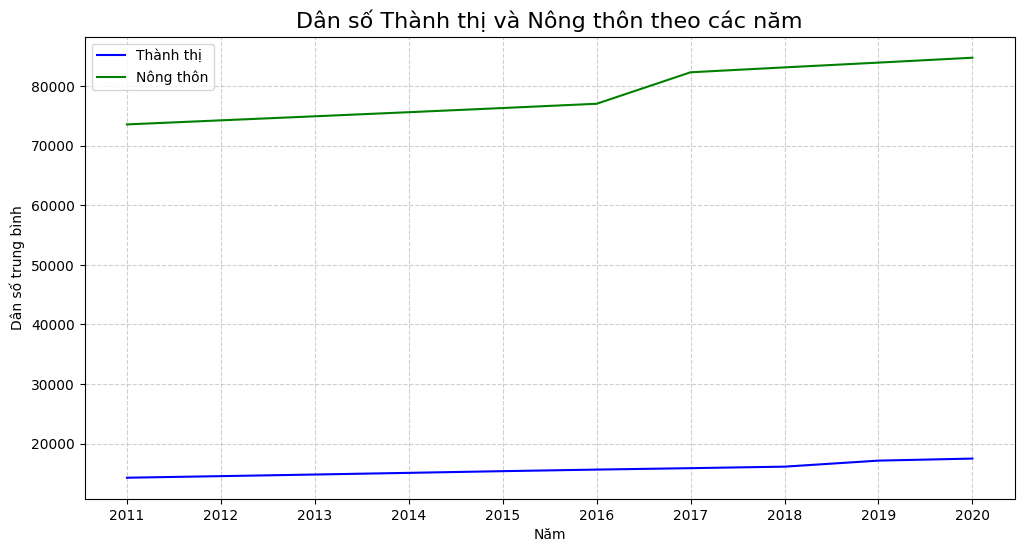

In [47]:
# Vẽ biểu đồ: Dân số theo khu vực (thành thị và nông thôn)
plt.figure(figsize=(12, 6))
# Đồ thị dân số thành thị
plt.plot(urban_population_by_year["Year"], 
         urban_population_by_year["Average population"], 
         label="Thành thị", color='blue')

# Đồ thị dân số nông thôn
plt.plot(rural_population_by_year["Year"], 
         rural_population_by_year["Average population"], 
         label="Nông thôn", color='green')

plt.title("Dân số Thành thị và Nông thôn theo các năm", fontsize=16)
plt.xlabel("Năm")
plt.xticks(rural_population_by_year.Year)
plt.ylabel("Dân số trung bình")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend();
